<a href="https://colab.research.google.com/github/parksoy/toolbox2023/blob/main/Copy_of_remaining_useful_lifetime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RUL predictive maintenance

Originally Taken from https://www.kaggle.com/code/parksoy/remaining-useful-lifetime-prediction/edit
 

image from https://sac0800fone.com/aplicacoes-que-facilitam-a-sua-vida-e-ajuda-na-bateria/

# Introduction

Remaining useful life (RUL) is the amount of time a machine or an asset is likely to operate before it requires repair or replacement. Depending on your system, this time period can be represented in number of Days, Miles, Cycles or any other quantity. RUL prediction provides early warnings of failure and has become a key component in the prognostics and health management of systems. It allows engineers to schedule maintenance, optimize operating efficiency and avoid unplanned downtime.
 

This image shows the deterioration of a machine over time. If A is the current condition and B is the minimum acceptable condition beyond which the machine will fail, Remaining Useful Life is computed as the time between these two points. If RUL is estimated in advance, maintenance or replacement can be carried out to avoid unplanned downtime and economic losses. Since the prediction of RUL is critical to operations and decision making, it is important to estimate it accurately.

reference: 'Remaining Useful Life (RUL) Prediction'( https://www.stratada.com/remaining-useful-life-rul-prediction/ )

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing and data outline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/data/Battery_RUL.csv')

In [5]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [ ]:
numlist=df.columns

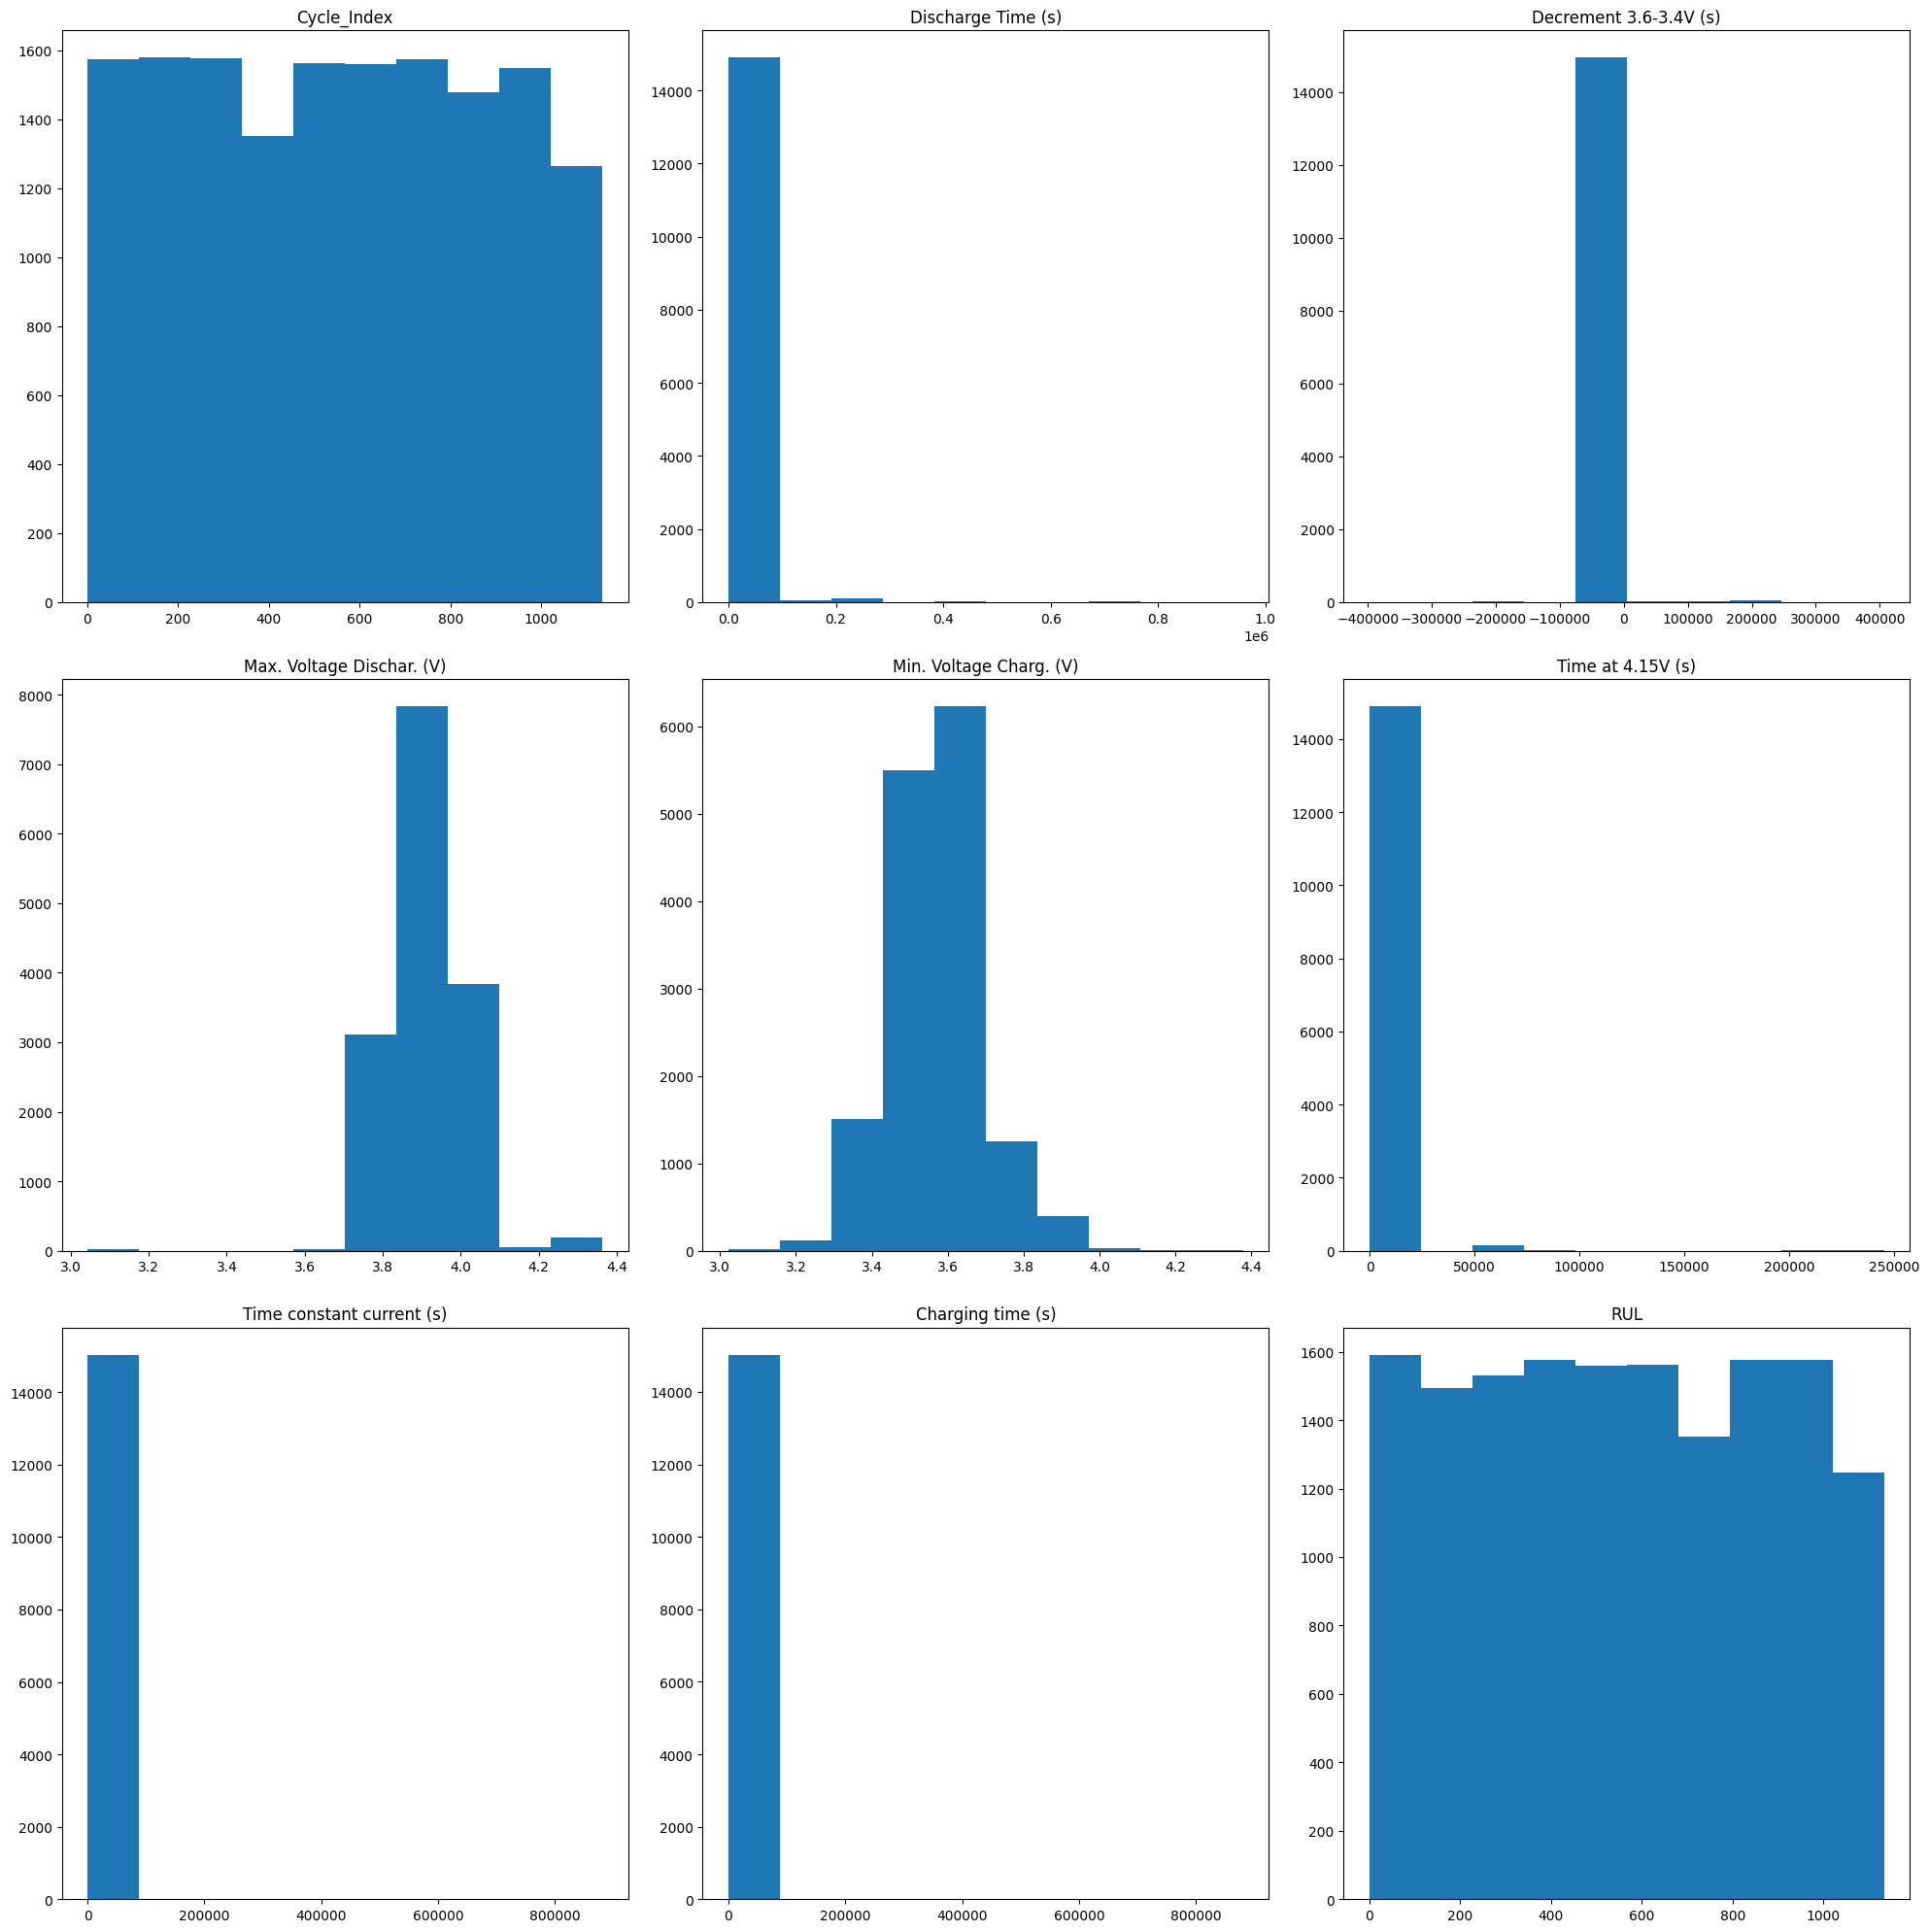

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(len(numlist)):
    plt.subplot(3,3,i+1)
    plt.title(numlist[i],fontsize=12)
    plt.hist(df[numlist[i]])

plt.tight_layout()

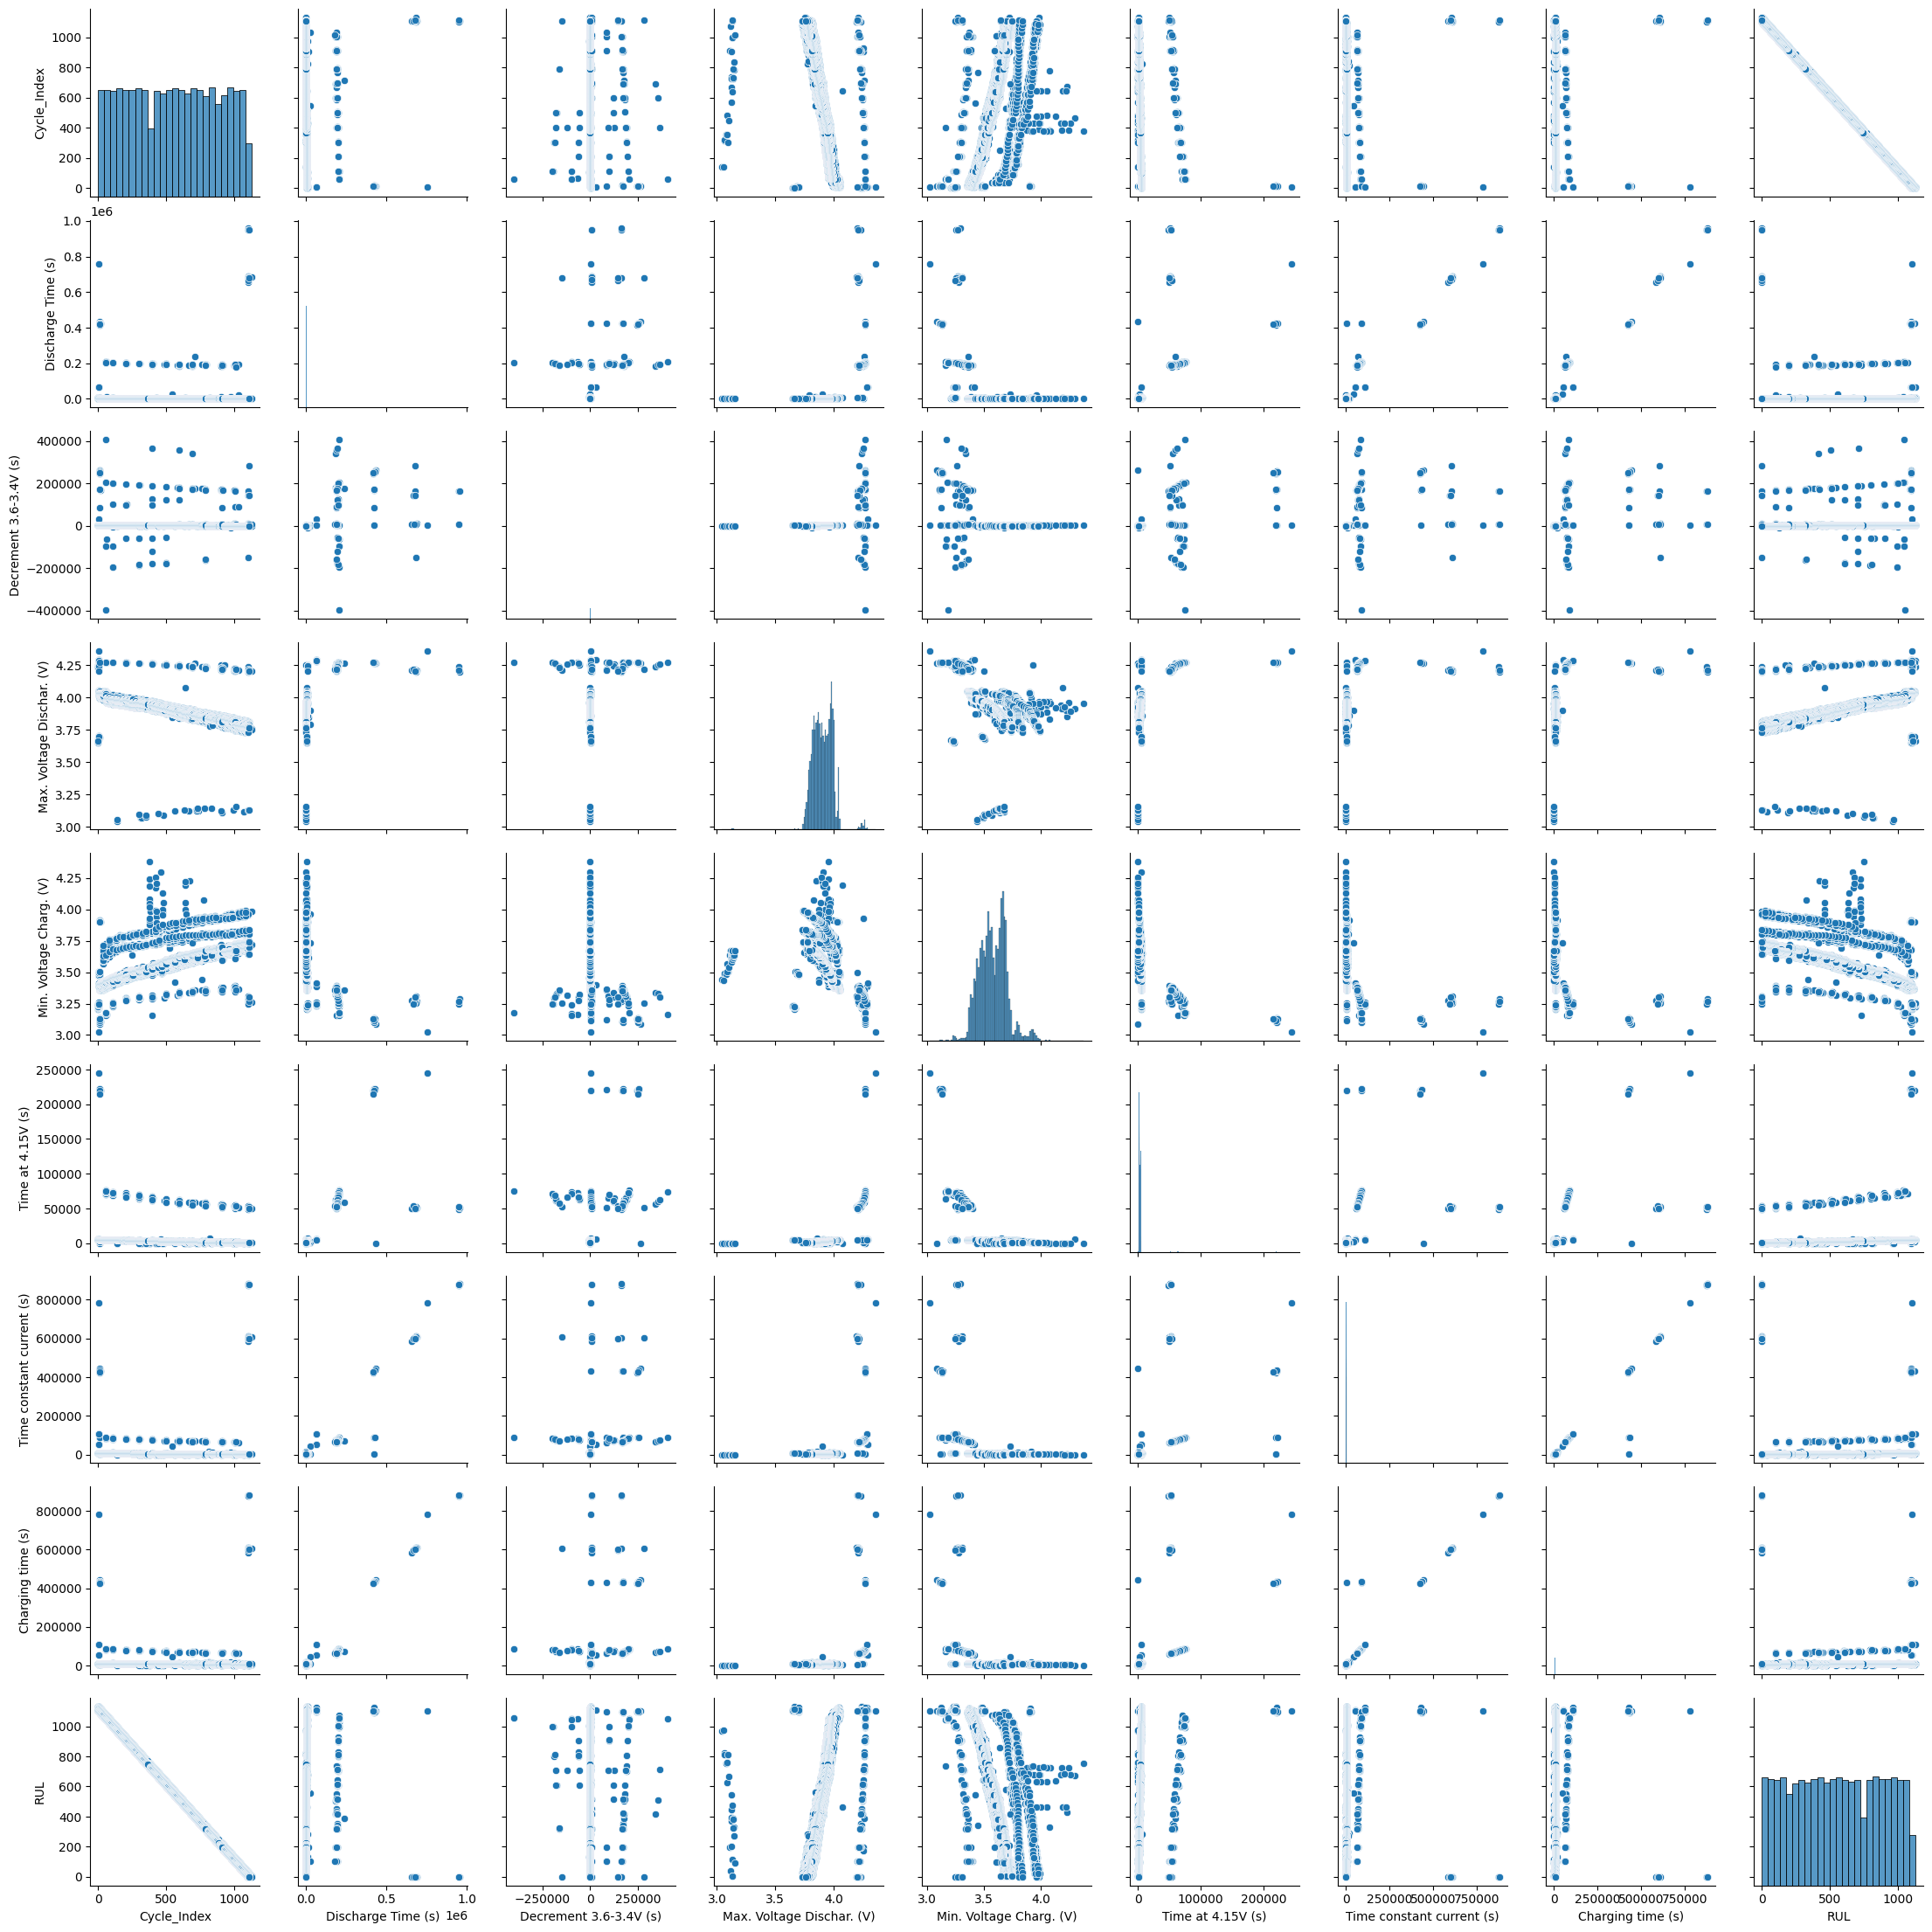

In [6]:
sns.pairplot(df)

# Correlation among features

<Axes: >

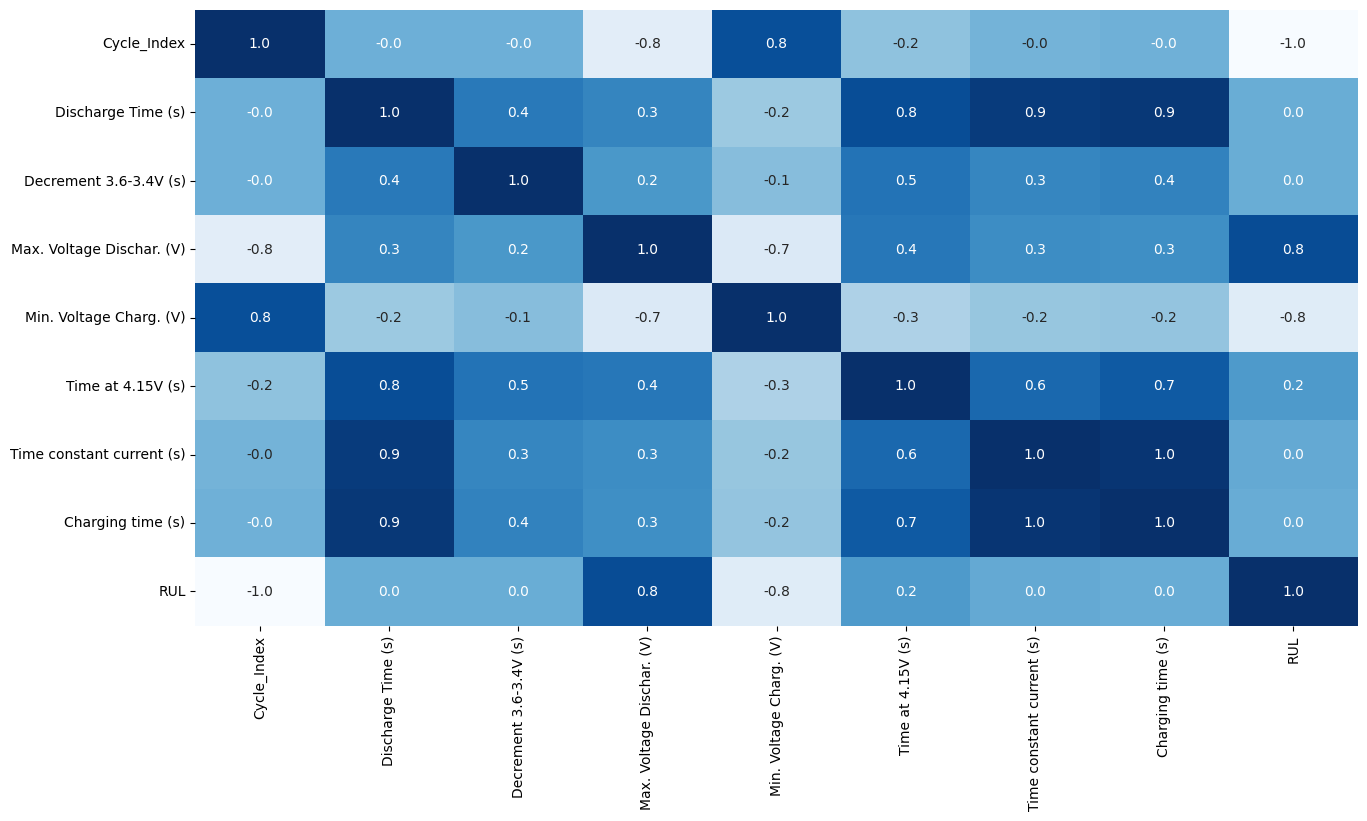

In [7]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

Correlation between RUL and
* Max. Voltage Dischar. (V) is 0.8
* Min. Voltage Charg. (V) is -0.8
* Time at 4.15V (s) is 0.2
* Cycle index is -1.0
* Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s)　are 0. And correlation between Time at 4.15V and these four features are 0.8, 0.5,0.6 and 0.7.

So I drop Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s). And I drop 'Cycle_Index' from features because it may cause leakage.

In [8]:
df1=df.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)'],axis=1)

# Prediction Model

In [9]:
pip install pycaret --ignore-installed llvmlite numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.7/797.7 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━

In [10]:
pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.57.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.6 MB)
  Using cached llvmlite-0.40.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.1 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [16]:
!conda install -c numba llvmlite

/bin/bash: conda: command not found


In [17]:
from pycaret.regression import *

In [18]:
exp_reg = setup(df1, target = 'RUL', session_id=1) #silent=True,

,Description,Value
0,Session id,1
1,Target,RUL
2,Target type,Regression
3,Original data shape,"(15064, 4)"
4,Transformed data shape,"(15064, 4)"
5,Transformed train set shape,"(10544, 4)"
6,Transformed test set shape,"(4520, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [19]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,14.3974,973.1120,30.8631,0.9906,0.2467,0.1622,2.1390
rf,Random Forest Regressor,16.0495,1077.2664,32.6200,0.9896,0.2419,0.1656,2.9380
xgboost,Extreme Gradient Boosting,22.2179,1383.7355,36.9597,0.9867,0.2828,0.2181,0.8190
lightgbm,Light Gradient Boosting Machine,27.5884,1659.6889,40.6332,0.9840,0.3273,0.2639,0.5880
dt,Decision Tree Regressor,17.4280,1900.5009,43.2262,0.9817,0.2955,0.1888,0.0750
gbr,Gradient Boosting Regressor,35.6539,2456.6430,49.4168,0.9764,0.3926,0.3474,0.8590
knn,K Neighbors Regressor,42.5482,4463.7321,66.7569,0.9571,0.4297,0.4081,0.0570
ada,AdaBoost Regressor,64.0910,5795.2248,76.0617,0.9442,0.5519,0.7953,0.8540
ridge,Ridge Regression,107.7786,27522.7720,165.2463,0.7354,0.6973,0.9539,0.0470
lr,Linear Regression,106.7468,27537.7447,165.2343,0.7353,0.6902,0.9386,0.8090


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=1)

In [20]:
reg_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.4928,880.1018,29.6665,0.9914,0.3187,0.2511
1,13.7230,803.5686,28.3473,0.9922,0.2686,0.1326
2,14.7050,1855.0395,43.0702,0.9822,0.2215,0.1152
3,13.9914,1127.0873,33.5721,0.9894,0.2365,0.1209
4,14.2464,886.5512,29.7750,0.9910,0.2303,0.1698
5,15.3467,900.3882,30.0065,0.9914,0.2728,0.2331
6,16.3396,1023.3138,31.9893,0.9903,0.2772,0.2561
7,13.3255,775.3381,27.8449,0.9927,0.2314,0.1377
8,13.7815,682.2909,26.1207,0.9934,0.2045,0.0998


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

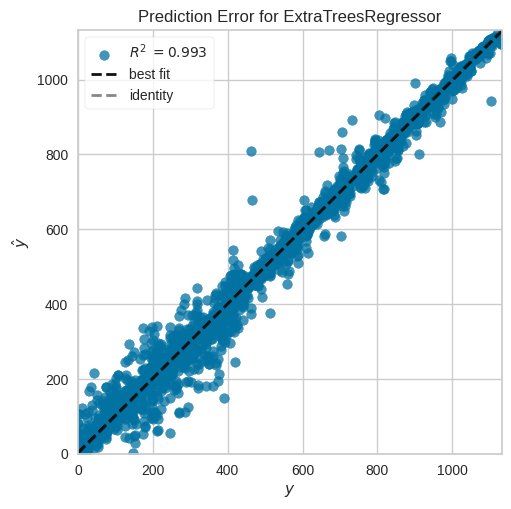

In [21]:
plot_model(reg_model,plot='error')

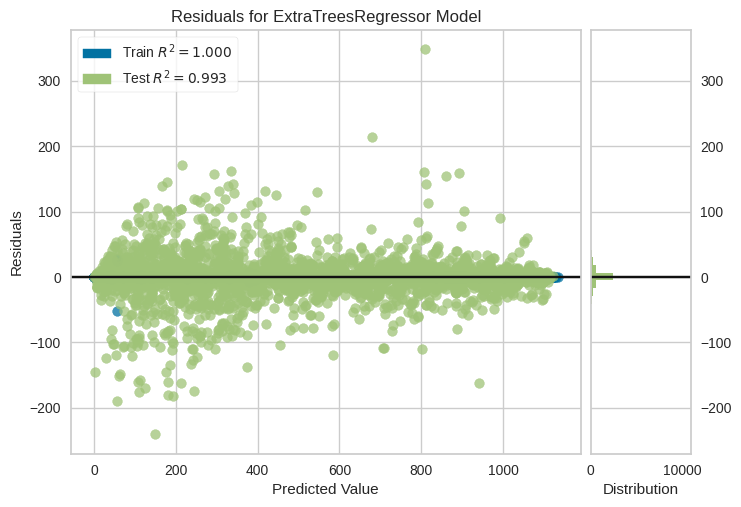

In [22]:
plot_model(reg_model,plot='residuals')

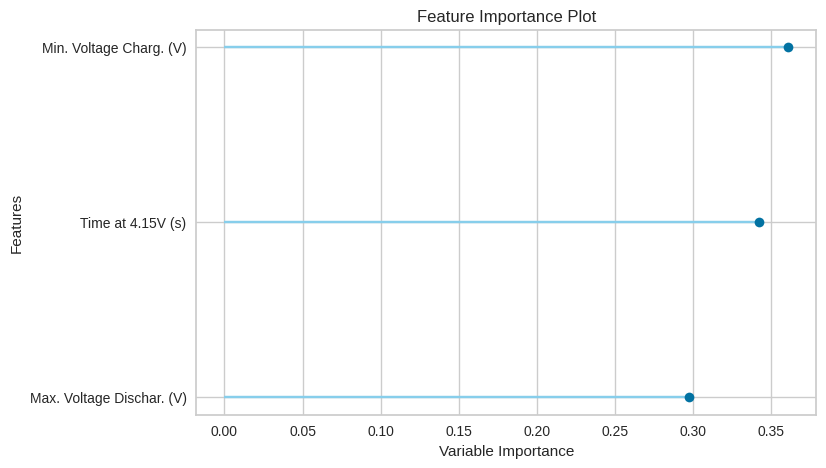

In [23]:
plot_model(reg_model,plot='feature')

# Additional Try - Blending

In [24]:
xgb = create_model('xgboost',verbose=False)
rf = create_model('rf', verbose = False)

In [25]:
blend_specific = blend_models(estimator_list = [rf,xgb,reg_model])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.9455,933.5730,30.5544,0.9909,0.3187,0.2664
1,16.0455,896.6412,29.9440,0.9913,0.2693,0.1398
2,17.4635,1654.3546,40.6738,0.9841,0.2224,0.1247
3,16.6233,1299.6365,36.0505,0.9878,0.2391,0.1366
4,17.1164,1040.3126,32.2539,0.9894,0.2423,0.1935
5,17.9891,957.7253,30.9471,0.9909,0.2797,0.2578
6,19.2879,1275.0293,35.7076,0.9879,0.2801,0.2845
7,15.8157,815.1581,28.5510,0.9923,0.2445,0.1623
8,16.0105,739.5562,27.1948,0.9928,0.1997,0.1029


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

It is not better than 'reg_model'.

Thank you !